C:\Users\KSW\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   CHAS     394 non-null    float64
 3   RM       394 non-null    float64
 4   RAD      394 non-null    int64  
 5   TAX      394 non-null    int64  
 6   PTRATIO  394 non-null    float64
 7   B        394 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.7 KB
MSE: 6325.207288681883


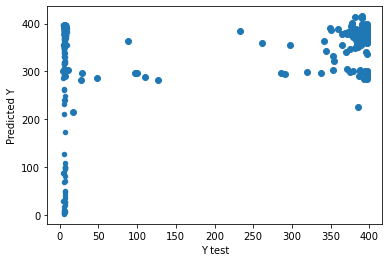

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('Boston_housing.csv')

dataset.isnull().sum()
data = dataset.dropna()
data.isnull().sum()
data.drop(['INDUS','NOX','AGE','DIS','LSTAT','MEDV'], axis=1, inplace=True)
data.info()

data.plot.scatter('RM','B')
X = data[['CRIM','ZN','CHAS','RM','RAD','TAX',
          'PTRATIO']]
y = data['B']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 22)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MSE:', metrics.mean_squared_error(y_test, predictions))

<AxesSubplot:>

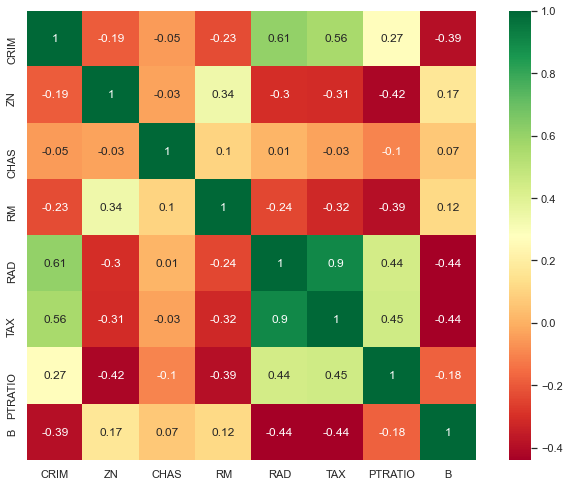

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr().round(2), square=True, cmap='RdYlGn', annot=True)